<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [15]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url='http://yustiks.ru/dataset/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(url,  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное - RM
2.   Равномерное
3.   Биноминальное - NOX, AGE, MEDV
4.   Бернулли - CHAS, RAD
5.   Геометрическое - DIS
6.   Логнормальное - CRIM, ZN



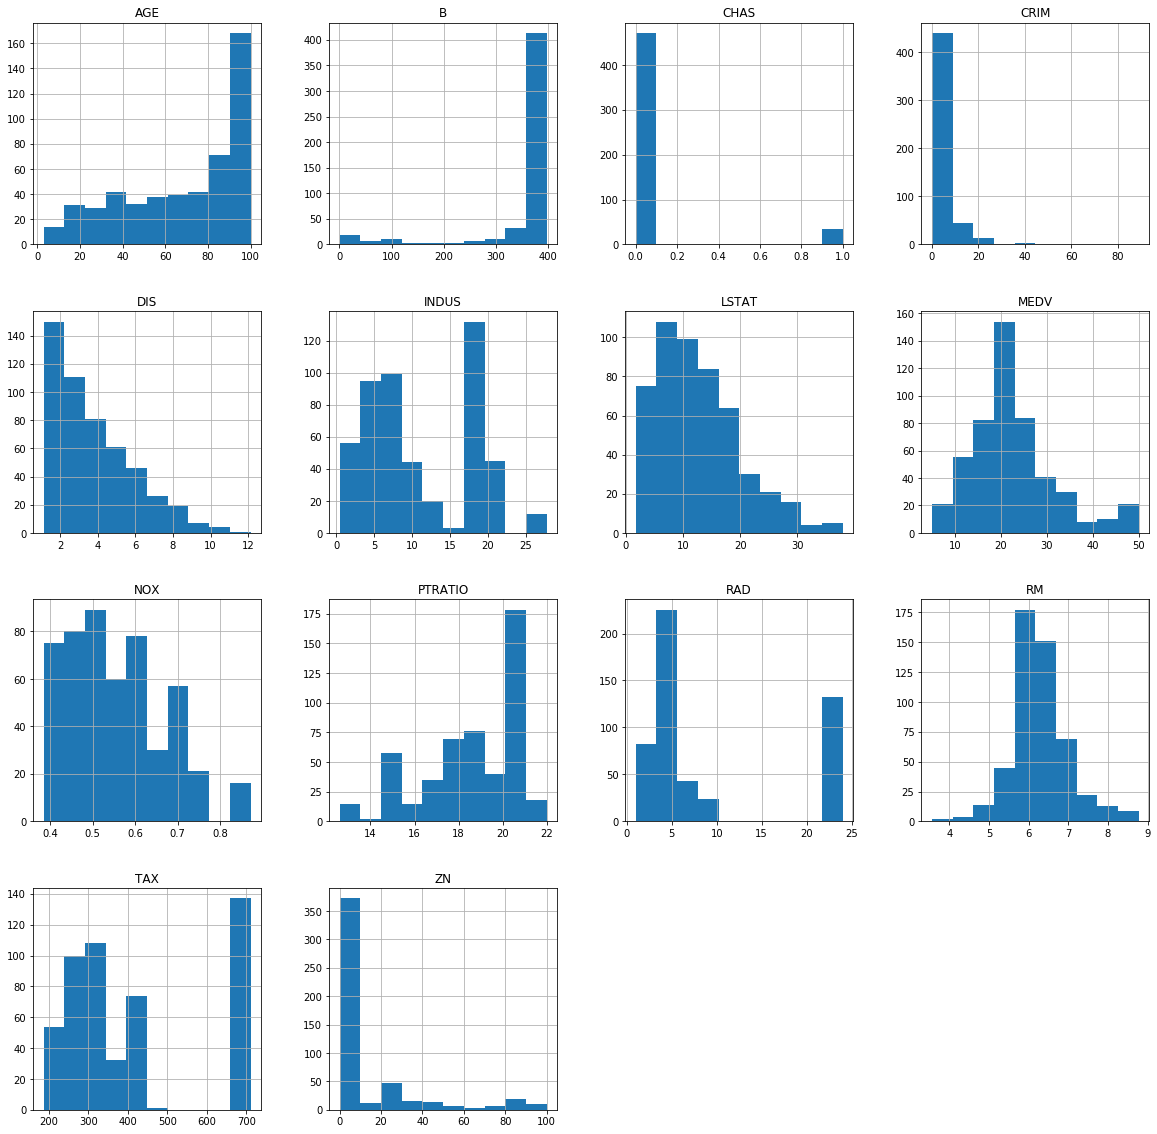

In [16]:
data.hist(figsize=(20,20))
plt.show()

Построить матрицу корреляций для данной таблицы и выбрать максимально коррелирующий атрибут (несколько атрибутов) с ценой на дома (MEDV атрибут).

In [17]:
corr_mtrx = data.corr()
corr_mtrx

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


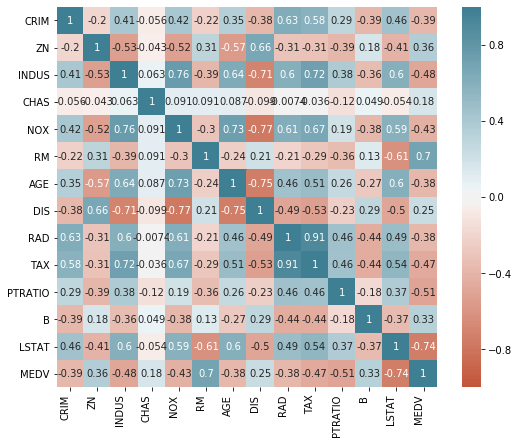

In [18]:
plt.figure(figsize=(9,7))

mtrx = sns.heatmap(corr_mtrx, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),
    annot=True,square=True)

i, k = mtrx.get_ylim()
mtrx.set_ylim(i+0.5, k-0.5)

mtrx.set_xticklabels(mtrx.get_xticklabels(), horizontalalignment='right');

**Ответ:** С ценой дома (MEDV) максимально (но не сильно) коррелируют показатель доли жилого участка (ZN) и (почему-то оО) доля афроамериканцев в населении города.

Написать **линейную регрессию** на два атрибута. Допустим, мы хотим предсказать цену дома (MEDV) в Бостоне, зная что цена на дом имеет линейную зависимость с атрибутом LSTAT. 

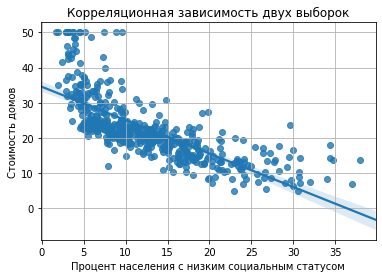

In [19]:
lstat = data['LSTAT']
medv = data['MEDV']
sns.regplot(x= lstat, y=medv ,data=data, fit_reg=True)
plt.xlabel('Процент населения с низким социальным статусом')
plt.ylabel('Стоимость домов')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(True)
plt.show()



1.   Разделить данные на 80% тренировочных, 20% тестовых
2.   Составить модель линейной регрессии
3.   Посчитать ошибку модели на тестовых данных
4.   Сделать точечный график данных и полученной прямой линейной регрессии



In [20]:
data['LSTAT'].fillna(0, inplace = True)
data['MEDV'].fillna(0, inplace = True)

In [21]:
lstat = data['LSTAT']
medv = data['MEDV']

In [22]:
lstat = np.array(lstat).reshape(-1,1)
mdev = np.array(medv).reshape(-1,1)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(lstat, mdev, test_size = 0.2, random_state = 80)

In [25]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
predicted_y = model.predict(x_test)

In [27]:
model.coef_

array([[-0.95346699]])

In [28]:
model.intercept_

array([34.6977593])

In [29]:
model.score(x_test, y_test)

0.5406679190903841

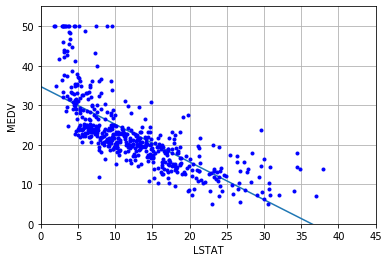

In [30]:
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
x = np.linspace(0, 100, 100)
y = model.coef_*x + model.intercept_ 
y = np.transpose(y)
plt.plot(x,y)
plt.plot(lstat, medv, 'b.' )
plt.grid(True)
plt.xlim(0,45)
plt.ylim(0,55)
plt.show()

Загрузить таблицу Happiness report. Посчитать матрицу ковариаций попарно. 

In [2]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [4]:
cov_mtrx_happy = data.cov()
cov_mtrx_happy

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,2041.000000,1100.838710,995.928571,1061.207792,1657.428571,1108.090909,370.874150,1008.948052,1615.000000,1613.369128
SD of Ladder,1100.838710,2041.000000,173.694805,1259.805195,1219.519481,512.363636,506.897959,797.779221,1254.526490,1208.026846
Positive affect,995.928571,173.694805,2015.000000,785.240260,778.331169,1373.766234,405.292517,715.077922,586.120000,647.908897
Negative affect,1061.207792,1259.805195,785.240260,2015.000000,1253.103896,866.935065,309.231293,681.525974,1050.926667,944.803192
Social support,1657.428571,1219.519481,778.331169,1253.103896,2015.000000,904.538961,230.741497,891.500000,1509.293333,1471.919100
Freedom,1108.090909,512.363636,1373.766234,866.935065,904.538961,2015.000000,736.268707,987.331169,800.926667,821.386087
Corruption,370.874150,506.897959,405.292517,309.231293,230.741497,736.268707,1837.666667,511.333333,368.289773,233.044951
Generosity,1008.948052,797.779221,715.077922,681.525974,891.500000,987.331169,511.333333,2015.000000,949.020000,836.343869
Log of GDP\nper capita,1615.000000,1254.526490,586.120000,1050.926667,1509.293333,800.926667,368.289773,949.020000,1938.000000,1614.025970
Healthy life\nexpectancy,1613.369128,1208.026846,647.908897,944.803192,1471.919100,821.386087,233.044951,836.343869,1614.025970,1887.500000


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop).

In [7]:
columns=['Country (region)','Ladder','SD of Ladder','Positive affect','Negative affect','Social support',
               'Freedom','Corruption','Generosity','Log of GDP\nper capita','Healthy life\nexpectancy']

total_sum=0

for name in columns:
    count=data[name].isnull().sum()
    total_sum+=count
print('В выборке отсутствующих значений {:}'.format(total_sum))

В выборке отсутствующих значений 23


In [10]:
count_nan=data['Country (region)'].isnull().sum()
if count_nan!=0:
    data['Country (region)'].dropna()
data.head(15)

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,Switzerland,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,Sweden,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,New Zealand,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,Canada,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,Austria,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


Сколько стран в выборке? Написать ответ. 

In [11]:
print('В выборке {:} стран'.format(len(data['Country (region)'])))

В выборке 156 стран


Построить матрицу корреляций для таблицы. Какие можно сделать выводы?

In [12]:
corr_mtrx_happy = data.corr()
corr_mtrx_happy

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.000000,0.539362,0.491432,0.523643,0.817842,0.546777,0.190071,0.497856,0.813367,0.816740
SD of Ladder,0.539362,1.000000,0.085381,0.619267,0.599464,0.251856,0.258639,0.392154,0.629662,0.611376
Positive affect,0.491432,0.085381,1.000000,0.389697,0.386269,0.681770,0.209659,0.354877,0.304522,0.332839
Negative affect,0.523643,0.619267,0.389697,1.000000,0.621888,0.430241,0.158903,0.338226,0.542143,0.488649
Social support,0.817842,0.599464,0.386269,0.621888,1.000000,0.448903,0.118434,0.442432,0.772912,0.740728
Freedom,0.546777,0.251856,0.681770,0.430241,0.448903,1.000000,0.381304,0.489991,0.409501,0.416263
Corruption,0.190071,0.258639,0.209659,0.158903,0.118434,0.381304,1.000000,0.266138,0.198581,0.123132
Generosity,0.497856,0.392154,0.354877,0.338226,0.442432,0.489991,0.266138,1.000000,0.478739,0.431620
Log of GDP\nper capita,0.813367,0.629662,0.304522,0.542143,0.772912,0.409501,0.198581,0.478739,1.000000,0.847580
Healthy life\nexpectancy,0.816740,0.611376,0.332839,0.488649,0.740728,0.416263,0.123132,0.431620,0.847580,1.000000


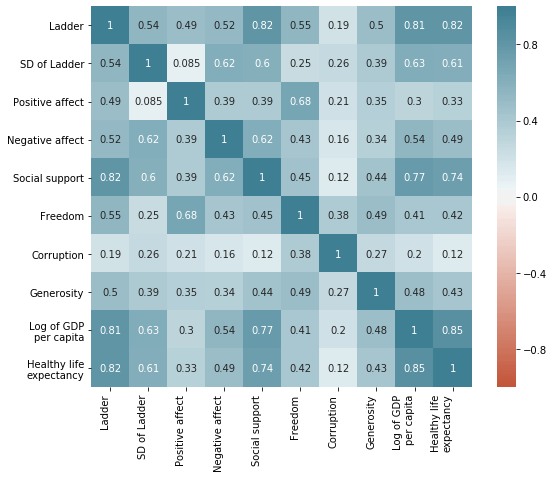

In [13]:
plt.figure(figsize=(9,7))

mtrx = sns.heatmap(corr_mtrx_happy, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),
    annot=True,square=True)

i, k = mtrx.get_ylim()
mtrx.set_ylim(i+0.5, k-0.5)

mtrx.set_xticklabels(mtrx.get_xticklabels(), horizontalalignment='right');

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

In [31]:
import random

In [46]:
count=10
d=0
flip=[]

def random_cube(data, n):
    for i in range(n):
        d=random.randint(1,6)
        data.append(d)
    return data

random_cube(flip, count)

[5, 6, 4, 2, 4, 3, 5, 3, 4, 2]

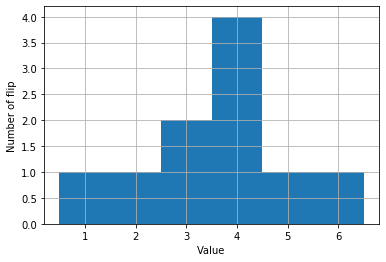

In [47]:
plt.hist(dice, bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5])
plt.xlabel('Value')
plt.ylabel('Number of flip')
plt.grid(True)
plt.show()

**Ответ:** Бета-распределение.

Смоделируйте 1000 раз сумму по 100 подбрасываний. Начертите диаграму histogram. Почему график изменился? Почему можно применить центральную предельную теорему?

In [45]:
number_of_flips=100
count_sum_100=1000
sum_dice_array=[]

def dice_sum(data_sum, count_flips, count_sum):
    for i in range(count_sum):
        data_dice=[]
        sum_list=0
        sum_list=sum(random_cube(data_dice, count_flips))
        data_sum.append(sum_list)
    return data_sum

dice_sum(sum_dice_array, number_of_flips, count_sum_100)

[363,
 335,
 347,
 350,
 342,
 349,
 359,
 333,
 334,
 376,
 366,
 368,
 323,
 350,
 374,
 349,
 390,
 366,
 329,
 350,
 360,
 353,
 351,
 358,
 318,
 357,
 367,
 303,
 371,
 325,
 346,
 332,
 373,
 380,
 361,
 335,
 405,
 363,
 351,
 331,
 356,
 344,
 343,
 397,
 365,
 372,
 351,
 344,
 353,
 343,
 382,
 342,
 338,
 365,
 354,
 376,
 379,
 324,
 339,
 318,
 326,
 330,
 324,
 357,
 347,
 336,
 346,
 348,
 344,
 360,
 352,
 343,
 367,
 343,
 356,
 346,
 341,
 356,
 359,
 315,
 344,
 327,
 340,
 373,
 341,
 341,
 360,
 342,
 345,
 370,
 358,
 318,
 333,
 357,
 349,
 358,
 332,
 349,
 324,
 378,
 345,
 345,
 372,
 359,
 334,
 349,
 353,
 357,
 363,
 323,
 366,
 338,
 373,
 347,
 336,
 337,
 345,
 321,
 355,
 391,
 325,
 381,
 354,
 357,
 377,
 362,
 356,
 334,
 362,
 342,
 364,
 370,
 357,
 330,
 357,
 339,
 337,
 347,
 357,
 378,
 339,
 351,
 350,
 382,
 330,
 324,
 351,
 373,
 353,
 337,
 348,
 361,
 351,
 361,
 346,
 327,
 350,
 354,
 348,
 322,
 320,
 303,
 345,
 343,
 376,
 352,
 338

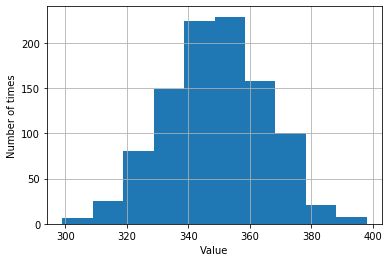

In [43]:
plt.hist(sum_dice_array)
plt.xlabel('Value')
plt.ylabel('Number of times')
plt.grid(True)
plt.show()

**Ответ:** Нормальное распределение. График изменился потому что мы строим для разных значений.